### Let's include Persistence though Checkpoints and threads in this Chatbot 
   Undertsand the Benifits of Persistence which are Human in the loop, fault tolerance, Short term memory, time travel

In [1]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver

/Users/priya/LangChain/langchainvenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
load_dotenv()
llm =ChatOpenAI()

In [3]:
class JokeState(TypedDict):
    
    topic:str
    joke:str
    explination:str


In [14]:
def Generate_Joke(state: JokeState):

    prompt = f"Generate a joke on this specified topic in 1 lines {state['topic']}"
    response= llm.invoke(prompt).content

    return {'joke' : response}

In [19]:
def Generate_explination(state: JokeState):

    prompt = f"Generate an explination to this joke in 2-3 lines {state['joke']}"
    response= llm.invoke(prompt).content

    return {'explination' : response}

In [20]:
graph=StateGraph(JokeState)

graph.add_node("Generate_Joke", Generate_Joke)
graph.add_node("Generate_Explination", Generate_explination)

graph.add_edge(START, 'Generate_Joke')
graph.add_edge('Generate_Joke', 'Generate_Explination')
graph.add_edge('Generate_Explination', END)

checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)

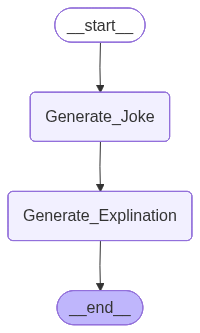

In [10]:
workflow

In [26]:
config1 = {"configurable": {"thread_id": "1"}}

while True:

    topic=input('type  your topic here: ')
    print(f'Topic selected by user: {topic}')

    if topic.strip().lower() in ['quit', 'bye', 'end']:
        break
    response=workflow.invoke({'topic': topic}, config=config1)
    print(f'response given by AI: {response}')

Topic selected by user: london
response given by AI: {'topic': 'london', 'joke': 'Why did the Londoner bring a ladder to the bar? Because they heard the drinks were on the house!', 'explination': 'The joke is playing on the phrase "drinks on the house," which means that the drinks are free. The Londoner brought a ladder to the bar to humorously take the phrase literally, thinking they could physically climb up to get the free drinks.'}
Topic selected by user: quit


In [27]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'london', 'joke': 'Why did the Londoner bring a ladder to the bar? Because they heard the drinks were on the house!', 'explination': 'The joke is playing on the phrase "drinks on the house," which means that the drinks are free. The Londoner brought a ladder to the bar to humorously take the phrase literally, thinking they could physically climb up to get the free drinks.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e6-fe1c-608a-8002-507220d7f0b1'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-10T21:50:53.936418+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e6-f85a-6f0c-8001-e04fc58cdc3b'}}, tasks=(), interrupts=())

In [28]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'london', 'joke': 'Why did the Londoner bring a ladder to the bar? Because they heard the drinks were on the house!', 'explination': 'The joke is playing on the phrase "drinks on the house," which means that the drinks are free. The Londoner brought a ladder to the bar to humorously take the phrase literally, thinking they could physically climb up to get the free drinks.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e6-fe1c-608a-8002-507220d7f0b1'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-10T21:50:53.936418+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e6-f85a-6f0c-8001-e04fc58cdc3b'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'london', 'joke': 'Why did the Londoner bring a ladder to the bar? Because they heard the drinks were on the house!'}, next=('Generate_Explination',), config={'configur

### let's understand threads concept

In [29]:
config2={"configurable": {"thread_id": "2"}}
workflow.invoke({"topic": input("enter a topic to generate joke here: ")}, config=config2)

{'topic': 'sky',
 'joke': 'Why did the cloud break up with the sky? It needed some space!',
 'explination': 'The cloud wanted some distance from the sky to have its own space. It\'s a play on words using the term "space" both literally and figuratively.'}

In [30]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'sky', 'joke': 'Why did the cloud break up with the sky? It needed some space!', 'explination': 'The cloud wanted some distance from the sky to have its own space. It\'s a play on words using the term "space" both literally and figuratively.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e7-fe0c-62f6-8006-22a1d2ef508e'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2026-01-10T21:51:20.773482+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e7-f356-6c26-8005-5380ccf796fc'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'sky', 'joke': 'Why did the cloud break up with the sky? It needed some space!', 'explination': 'The joke is playing on the literal meaning of "needing space" in a relationship, as clouds and the sky are typically seen as being close together. So, in this context, the cloud broke up with the sky beca

In [31]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'london', 'joke': 'Why did the Londoner bring a ladder to the bar? Because they heard the drinks were on the house!', 'explination': 'The joke is playing on the phrase "drinks on the house," which means that the drinks are free. The Londoner brought a ladder to the bar to humorously take the phrase literally, thinking they could physically climb up to get the free drinks.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e6-fe1c-608a-8002-507220d7f0b1'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-10T21:50:53.936418+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e6-f85a-6f0c-8001-e04fc58cdc3b'}}, tasks=(), interrupts=())

In [ ]:
list(workflow.get_state_history(config1)) # hence thread1 state is diffrent from thread2  

[StateSnapshot(values={'topic': 'london', 'joke': 'Why did the Londoner bring a ladder to the bar? Because they heard the drinks were on the house!', 'explination': 'The joke is playing on the phrase "drinks on the house," which means that the drinks are free. The Londoner brought a ladder to the bar to humorously take the phrase literally, thinking they could physically climb up to get the free drinks.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e6-fe1c-608a-8002-507220d7f0b1'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-10T21:50:53.936418+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e6-f85a-6f0c-8001-e04fc58cdc3b'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'london', 'joke': 'Why did the Londoner bring a ladder to the bar? Because they heard the drinks were on the house!'}, next=('Generate_Explination',), config={'configur

## TimeTravel

In [ ]:
# TimeTravel -- using the thread ids and checkpointers we can travel backwards and see what actually happend in that perticular step

workflow.get_state({"configurable": {"thread_id": "1", 'checkpoint_id': '1f0ee6e6-f85a-6f0c-8001-e04fc58cdc3b'}})


StateSnapshot(values={'topic': 'london', 'joke': 'Why did the Londoner bring a ladder to the bar? Because they heard the drinks were on the house!'}, next=('Generate_Explination',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0ee6e6-f85a-6f0c-8001-e04fc58cdc3b'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-01-10T21:50:53.333041+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e6-e65d-65d4-8000-cb2d0956dd3f'}}, tasks=(PregelTask(id='532d6b97-dad4-6670-eaa3-d0fc9bcfcd61', name='Generate_Explination', path=('__pregel_pull', 'Generate_Explination'), error=None, interrupts=(), state=None, result={'explination': 'The joke is playing on the phrase "drinks on the house," which means that the drinks are free. The Londoner brought a ladder to the bar to humorously take the phrase literally, thinking they could physically climb up to get the free drinks.'}),), interrupts=())

In [ ]:
# TimeTravel -- once that  perticular step  is retrieved we can resume the workflow from there

workflow.invoke(None,{"configurable": {"thread_id": "1", 'checkpoint_id': '1f0ee6e6-f85a-6f0c-8001-e04fc58cdc3b'}})

{'topic': 'london',
 'joke': 'Why did the Londoner bring a ladder to the bar? Because they heard the drinks were on the house!',
 'explination': 'The Londoner brought a ladder to the bar because they thought the drinks were on the house, meaning they were free. The ladder symbolizes climbing up to get the free drinks.'}

In [ ]:
list(workflow.get_state_history(config1)) # we can observe two different explinations were created for the same topic and joke, as we resumed the using timetravel 

[StateSnapshot(values={'topic': 'london', 'joke': 'Why did the Londoner bring a ladder to the bar? Because they heard the drinks were on the house!', 'explination': 'The Londoner brought a ladder to the bar because they thought the drinks were on the house, meaning they were free. The ladder symbolizes climbing up to get the free drinks.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6fd-62a9-6b36-8002-a149668df4e3'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-10T22:00:55.038195+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee6e6-f85a-6f0c-8001-e04fc58cdc3b'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'london', 'joke': 'Why did the Londoner bring a ladder to the bar? Because they heard the drinks were on the house!', 'explination': 'The joke is playing on the phrase "drinks on the house," which means that the drinks are free. The Lo

In [39]:
# TimeTravel -- updating the state via timtravel

workflow.update_state({"configurable": {"thread_id": "1", 'checkpoint_id': '1f0ee6e6-e65d-65d4-8000-cb2d0956dd3f','checkpoint_ns': ""}},{'topic': 'Paris'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ee71a-1e9e-62e4-8001-81d8c0ffdcf0'}}

In [40]:
workflow.invoke(None, {'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ee71a-1e9e-62e4-8001-81d8c0ffdcf0'}})

{'topic': 'Paris',
 'joke': 'Why do French people never play hide and seek in Paris? Because good luck hiding with all those Eiffel Towers!',
 'explination': 'This joke is referencing the fact that the Eiffel Tower is a prominent and easily recognizable landmark in Paris, making it nearly impossible to hide among multiple towers. So, playing hide and seek in Paris would not be very challenging or fun.'}

In [41]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Paris', 'joke': 'Why do French people never play hide and seek in Paris? Because good luck hiding with all those Eiffel Towers!', 'explination': 'This joke is referencing the fact that the Eiffel Tower is a prominent and easily recognizable landmark in Paris, making it nearly impossible to hide among multiple towers. So, playing hide and seek in Paris would not be very challenging or fun.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee71e-9c1e-6738-8003-f01f2eef0625'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-10T22:15:46.899906+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ee71e-9494-6cce-8002-7fac3f7686a8'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'Paris', 'joke': 'Why do French people never play hide and seek in Paris? Because good luck hiding with all those Eiffel Towers!'}, next=('Generate_Ex